## Project Objective / Business Relevance

*Pseudomonas aeruginosa* frequently infects hospitalized patients and has high morbidity and mortality rates. With antibiotic resistance emerging as a major problem in effective *P. aeruginosa* treatment, innovative testing methods are in high-demand to better inform drug prescriptions. 

The aim of this project is to build a classification model to accurately predict the susceptiblity of *P. aeruginosa* isolates to the commonly-used drug tobramycin. The model will be trained using *orfN* gene sequences, a gene which has been shown to mutate first to convey tobramycin resistance in the bacteria.

This model will hopefully serve as the basis for a rapid anti-microbial susceptibility testing method (AST). Using only one type of gene means significantly less data will be required compared to other proposed methods.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

## Importing and Cleaning Data

Data will be obtained from two different sources. 

1. The *orfN* gene sequence data for each isolate was obtained from the BV-BRC database using the reference sequence locus tag “PA14_23460”: https://www.bv-brc.org/view/Feature/PATRIC.208963.12.NC_008463.CDS.2040149.2041165.fwd

2. The tobramycin resistance phenotype data was obtained from the “Dataset EV1” file in Khaledi et al. (2020):https://www.embopress.org/doi/full/10.15252/emmm.201910264

In [51]:
# Importing gene sequence data
seq_df = pd.read_csv('BV-BRC_Allstrains.csv')
seq_df

,Genome,Unnamed: 1,Unnamed: 2,Bv-BRC Strains,RefSeq Locus Tag,Alt Locus Tag,Feature ID,Annotation,Feature Type,Start,...,Length,Strand,FIGfam ID,PATRIC genus-specific families (PLfams),PATRIC cross-genus families (PGfams),Protein ID,AA Length,Gene Symbol,Product,GO
0,Pseudomonas,aeruginosa,strain,CF592_Iso2,NaN,NaN,PATRIC.287.12562.287.12562.con.0005.CDS.335292...,PATRIC,CDS,335292,...,1026,-,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
1,Pseudomonas,aeruginosa,strain,CF609_Iso3,NaN,NaN,PATRIC.287.12555.287.12555.con.0005.CDS.2376.3...,PATRIC,CDS,2376,...,1041,+,NaN,PLF_286_00001745,PGF_00780840,NaN,346,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
2,Pseudomonas,aeruginosa,strain,CH2500,NaN,NaN,PATRIC.287.12774.287.12774.con.0041.CDS.41.105...,PATRIC,CDS,41,...,1017,-,NaN,PLF_286_00001745,PGF_00780840,NaN,338,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
3,Pseudomonas,aeruginosa,strain,CH2527,NaN,NaN,PATRIC.287.12776.287.12776.con.0001.CDS.811102...,PATRIC,CDS,811102,...,1026,-,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
4,Pseudomonas,aeruginosa,strain,CH2543,NaN,NaN,PATRIC.287.12777.287.12777.con.0002.CDS.38770....,PATRIC,CDS,38770,...,1026,+,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Pseudomonas,aeruginosa,strain,ZG5089456,NaN,NaN,PATRIC.287.12548.287.12548.con.0003.CDS.404676...,PATRIC,CDS,404676,...,1020,-,NaN,PLF_286_00001745,PGF_00780840,NaN,339,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
377,Pseudomonas,aeruginosa,strain,ZG8006959,NaN,NaN,PATRIC.287.12550.287.12550.con.0003.CDS.410460...,PATRIC,CDS,410460,...,1026,-,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
378,Pseudomonas,aeruginosa,strain,ZG8038581181,NaN,NaN,PATRIC.287.12531.287.12531.con.0002.CDS.45243....,PATRIC,CDS,45243,...,885,+,NaN,PLF_286_00001745,PGF_00780840,NaN,294,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
379,Pseudomonas,aeruginosa,strain,ZG8510487,NaN,NaN,PATRIC.287.12547.287.12547.con.0003.CDS.402424...,PATRIC,CDS,402424,...,1020,-,NaN,PLF_286_00001745,PGF_00780840,NaN,339,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...


In [52]:
# Importing resistance phenotype data; only importing parts of excel sheet that are needed
phen_df = pd.read_csv('BactomeResistanceData.csv', usecols=[1, 2, 3, 4], nrows=377)
phen_df

,Isolate,Supplier (Geographic origin),TOB,MIC*
0,CF592_Iso2,University Hospital Essen (Essen),S,2.0
1,CF609_Iso3,University Hospital Essen (Essen),I,8.0
2,CH2500,Charité Berlin (Berlin),S,0.5
3,CH2527,Charité Berlin (Berlin),S,0.5
4,CH2543,Charité Berlin (Berlin),R,512.0
...,...,...,...,...
372,ZG5089456,Private practice laboratory (Leipzig),R,128.0
373,ZG8006959,Private practice laboratory (Leipzig),R,128.0
374,ZG8038581181,Private practice laboratory (Chemnitz),R,1.0
375,ZG8510487,Private practice laboratory (Leipzig),R,256.0


The datasets are cross-referenced to see for which isolates we have both types of data.

In [53]:
# Dropping extra isolates from seq_df
filt = seq_df['Bv-BRC Strains'].isin(phen_df['Isolate'])
to_drop = seq_df[filt == False]
seq_df.drop(to_drop.index, axis=0, inplace=True)
seq_df

,Genome,Unnamed: 1,Unnamed: 2,Bv-BRC Strains,RefSeq Locus Tag,Alt Locus Tag,Feature ID,Annotation,Feature Type,Start,...,Length,Strand,FIGfam ID,PATRIC genus-specific families (PLfams),PATRIC cross-genus families (PGfams),Protein ID,AA Length,Gene Symbol,Product,GO
0,Pseudomonas,aeruginosa,strain,CF592_Iso2,NaN,NaN,PATRIC.287.12562.287.12562.con.0005.CDS.335292...,PATRIC,CDS,335292,...,1026,-,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
1,Pseudomonas,aeruginosa,strain,CF609_Iso3,NaN,NaN,PATRIC.287.12555.287.12555.con.0005.CDS.2376.3...,PATRIC,CDS,2376,...,1041,+,NaN,PLF_286_00001745,PGF_00780840,NaN,346,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
2,Pseudomonas,aeruginosa,strain,CH2500,NaN,NaN,PATRIC.287.12774.287.12774.con.0041.CDS.41.105...,PATRIC,CDS,41,...,1017,-,NaN,PLF_286_00001745,PGF_00780840,NaN,338,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
3,Pseudomonas,aeruginosa,strain,CH2527,NaN,NaN,PATRIC.287.12776.287.12776.con.0001.CDS.811102...,PATRIC,CDS,811102,...,1026,-,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
4,Pseudomonas,aeruginosa,strain,CH2543,NaN,NaN,PATRIC.287.12777.287.12777.con.0002.CDS.38770....,PATRIC,CDS,38770,...,1026,+,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Pseudomonas,aeruginosa,strain,ZG5089456,NaN,NaN,PATRIC.287.12548.287.12548.con.0003.CDS.404676...,PATRIC,CDS,404676,...,1020,-,NaN,PLF_286_00001745,PGF_00780840,NaN,339,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
377,Pseudomonas,aeruginosa,strain,ZG8006959,NaN,NaN,PATRIC.287.12550.287.12550.con.0003.CDS.410460...,PATRIC,CDS,410460,...,1026,-,NaN,PLF_286_00001745,PGF_00780840,NaN,341,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
378,Pseudomonas,aeruginosa,strain,ZG8038581181,NaN,NaN,PATRIC.287.12531.287.12531.con.0002.CDS.45243....,PATRIC,CDS,45243,...,885,+,NaN,PLF_286_00001745,PGF_00780840,NaN,294,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...
379,Pseudomonas,aeruginosa,strain,ZG8510487,NaN,NaN,PATRIC.287.12547.287.12547.con.0003.CDS.402424...,PATRIC,CDS,402424,...,1020,-,NaN,PLF_286_00001745,PGF_00780840,NaN,339,NaN,Undecaprenyl-phosphate alpha-N-acetylglucosami...,GO:0036380|UDP-N-acetylglucosamine-undecapreny...


There are 4 isolates in the seq_df dataframe that we do not have phenotype data for. These isolates are dropped.

The isolates with “intermediate” susceptibility to tobramycin are dropped to broaden the gap between resistant and susceptible isolates. A gene length limit of +/- 36 was also imposed to limit sequence variability.

In [54]:
# Dropping isolates with I from phen_df
i_to_drop = phen_df[phen_df['TOB'] == 'I']
phen_df.drop(i_to_drop.index, axis=0, inplace=True)

# Dropping corresponding isolates from seq_df
i_filter = seq_df['Bv-BRC Strains'].isin(i_to_drop['Isolate'])
seq_df = seq_df[~i_filter]

assert len(phen_df) == len(seq_df)

In [55]:
# Trying to use smaller range
# Creating bounds for gene length filtering
lower_lim = 1017 - 36
upper_lim = 1017 + 36

# Dropping isolates outside of length bounds from seq_df
len_to_drop = seq_df[(seq_df['Length'] > upper_lim) | (seq_df['Length'] < lower_lim)]
seq_df = seq_df.drop(len_to_drop.index, axis=0)

# Dropping corresponding isolates from phen_df
len_filter = phen_df['Isolate'].isin(len_to_drop['Bv-BRC Strains'])
phen_df = phen_df[~len_filter]

print(f"Length of phen_df: {len(phen_df)}, length of seq_df: {len(seq_df)}")

Length of phen_df: 334, length of seq_df: 334


This cleaning has left us with 334 isolates. The next step is to use multiple sequence alignment (MSA) using the BV-BRC website. This technique uses the “Mafft” aligner to align the isolate gene sequences as best as possible relative to the PA14 reference *orfN* sequence taken from the Pseudomonas Genome Database: https://www.pseudomonas.com/feature/show/?id=1654623&view=sequence

**possible improvments could be doing MSA with consensus as reference sequence OR not using a reference sequence**

In [56]:
from Bio import AlignIO
# Load MSA file in FASTA format
msa = AlignIO.read('MSA - 04-11-23.afa', 'fasta')
msa

<<class 'Bio.Align.MultipleSeqAlignment'> instance (336 records of length 1096) at 12e572690>

In [57]:
# Create a dataframe for msa
msa_df = pd.DataFrame()
# Add sequences from msa to dataframe
for i, record in enumerate(msa):
    msa_df[i] = list(record.seq)
# Flip rows and columns
msa_df = msa_df.transpose()
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_20221/3756365798.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  msa_df[i] = list(record.seq)


In [58]:
# Missing values are in present as '-' 
msa_df.replace('-', np.nan, inplace=True)

In [59]:
# Determining # columns with missing values
na_columns = msa_df.columns[msa_df.isnull().any()]
num_na_columns = len(na_columns)
print(f"There are {num_na_columns} columns with missing values.")

There are 105 columns with missing values.


These columns represent only ~10% of features so they will be dropped to facilitate feature encoding. There are still a large number of features for the models to learn from even after dropping these. Alternatively, the missing values could be imputed with mean values which would prevent eliminating features.

In [60]:
# Dropping columns with missing values
msa_df = msa_df.dropna(axis=1)
# Ensuring columns have been dropped
na_columns = msa_df.columns[msa_df.isnull().any()]
num_na_columns = len(na_columns)
print(f"There are {num_na_columns} columns with missing values.")

There are 0 columns with missing values.


In [61]:
# Set the index labels to the BRC ID's for each isolate
msa_df.index = [rec.id for rec in msa]
msa_df.replace('|', ':', inplace=True)
msa_df

,3,4,5,9,10,11,12,13,14,15,...,1032,1033,1034,1035,1036,1037,1038,1039,1059,1060
reference_seq,A,T,G,T,T,C,T,G,G,T,...,A,G,G,C,T,G,G,T,A,G
fig|287.12575.peg.884,a,t,g,t,g,g,a,t,g,a,...,a,g,g,c,g,g,g,t,a,a
fig|287.12774.peg.6398,a,t,g,t,t,c,t,g,g,t,...,a,g,g,c,t,g,g,t,a,g
fig|287.12717.peg.2225,a,t,g,c,t,a,t,g,g,t,...,a,g,g,c,c,g,g,a,a,c
fig|287.12585.peg.805,a,t,g,t,g,g,a,t,g,a,...,a,g,g,c,g,g,g,t,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fig|287.12544.peg.38,a,t,g,t,t,c,t,g,g,t,...,a,g,g,c,t,g,g,t,a,g
fig|287.12751.peg.5955,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c
fig|287.12514.peg.2110,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c
fig|287.12596.peg.40,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c


In [62]:
# Importing dataframe with corresponding BRC-ID's and strain names
mapping_df = pd.read_csv('BV-BRC ID Data.csv', usecols=['Strain', 'BRC ID', 'Length'])
# Dropping isolates outside of length bounds
len_to_drop = mapping_df[(mapping_df['Length'] > upper_lim) | (mapping_df['Length'] < lower_lim)]
mapping_df = mapping_df.drop(len_to_drop.index, axis=0)
# Replacing ":" with "|" in strain names
mapping_df['BRC ID'] = mapping_df['BRC ID'].str.replace(':', '|')
# Creating dictionnary that maps BRC ID's to strain names
mapping_dict = dict(zip(mapping_df['BRC ID'], mapping_df['Strain']))
# Rename msa_df index with mapping dictionnary
msa_df.index = msa_df.index.map(mapping_dict)
msa_df

,3,4,5,9,10,11,12,13,14,15,...,1032,1033,1034,1035,1036,1037,1038,1039,1059,1060
Reference PA14,A,T,G,T,T,C,T,G,G,T,...,A,G,G,C,T,G,G,T,A,G
F1775,a,t,g,t,g,g,a,t,g,a,...,a,g,g,c,g,g,g,t,a,a
CH2500,a,t,g,t,t,c,t,g,g,t,...,a,g,g,c,t,g,g,t,a,g
ESP057,a,t,g,c,t,a,t,g,g,t,...,a,g,g,c,c,g,g,a,a,c
F1748,a,t,g,t,g,g,a,t,g,a,...,a,g,g,c,g,g,g,t,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZG02512057,a,t,g,t,t,c,t,g,g,t,...,a,g,g,c,t,g,g,t,a,g
PSAE1642,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c
MHH17783,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c
F1862,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c


In [63]:
# Dropping reference PA14 strain rows
msa_df = msa_df.drop(['Reference PA14', 'UCBPP-PA14'])
msa_df

,3,4,5,9,10,11,12,13,14,15,...,1032,1033,1034,1035,1036,1037,1038,1039,1059,1060
F1775,a,t,g,t,g,g,a,t,g,a,...,a,g,g,c,g,g,g,t,a,a
CH2500,a,t,g,t,t,c,t,g,g,t,...,a,g,g,c,t,g,g,t,a,g
ESP057,a,t,g,c,t,a,t,g,g,t,...,a,g,g,c,c,g,g,a,a,c
F1748,a,t,g,t,g,g,a,t,g,a,...,a,g,g,c,g,g,g,t,a,a
F2176,a,t,g,c,t,a,t,g,g,t,...,a,g,g,c,c,g,g,a,a,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZG02512057,a,t,g,t,t,c,t,g,g,t,...,a,g,g,c,t,g,g,t,a,g
PSAE1642,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c
MHH17783,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c
F1862,a,t,g,t,t,a,a,t,a,a,...,g,t,g,c,c,g,g,a,a,c


In [85]:
msa_df = msa_df.apply(lambda x: x.str.upper())
msa_df.head(2)

,3,4,5,9,10,11,12,13,14,15,...,1032,1033,1034,1035,1036,1037,1038,1039,1059,1060
F1775,A,T,G,T,G,G,A,T,G,A,...,A,G,G,C,G,G,G,T,A,A
CH2500,A,T,G,T,T,C,T,G,G,T,...,A,G,G,C,T,G,G,T,A,G


In [86]:
msa_df.describe()

,3,4,5,9,10,11,12,13,14,15,...,1032,1033,1034,1035,1036,1037,1038,1039,1059,1060
count,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334
unique,1,1,1,4,4,4,3,2,3,3,...,2,2,1,1,3,1,2,4,3,3
top,A,T,G,T,T,A,T,G,G,T,...,A,G,G,C,G,G,G,T,A,C
freq,334,334,334,119,203,227,235,226,266,235,...,263,266,334,334,137,334,333,185,234,146


In [79]:
msa_df.index

Index(['F1775', 'CH2500', 'ESP057', 'F1748', 'F2176', 'PSAE1651', 'ZG316694',
       'F2098', 'MHH2419', 'MHH15083',
       ...
       'ZG302432', 'ESP031', 'CH4766', 'F2065', 'F1864', 'ZG02512057',
       'PSAE1642', 'MHH17783', 'F1862', 'CH2677'],
      dtype='object', length=334)

In [87]:
# Creating dataframe for nucleotide frequences
sequences = []
for i in msa_df.index:
    seq_list = msa_df.loc[i, :].values.tolist()
    sequences.append(seq_list)

frequencies = []
for i in range(len(sequences[0])):
    counts = {'A': 0, 'T': 0, 'G': 0, 'C': 0}
    for sequence in sequences:
        counts[sequences[i]] += 1
    frequencies.append(counts)
    
df_freq = pd.DataFrame(frequencies)
df_freq

TypeError: unhashable type: 'list'

In [94]:
nuc_freq = msa_df.apply(lambda x: x.value_counts(normalize=True)).fillna(0)
nuc_freq

,3,4,5,9,10,11,12,13,14,15,...,1032,1033,1034,1035,1036,1037,1038,1039,1059,1060
A,1.0,0.0,0.0,0.137725,0.272455,0.679641,0.287425,0.000000,0.176647,0.287425,...,0.787425,0.000000,0.0,0.0,0.000000,0.0,0.002994,0.410180,0.700599,0.392216
C,0.0,0.0,0.0,0.233533,0.008982,0.170659,0.008982,0.000000,0.026946,0.008982,...,0.000000,0.000000,0.0,1.0,0.410180,0.0,0.000000,0.026946,0.272455,0.437126
G,0.0,0.0,1.0,0.272455,0.110778,0.113772,0.000000,0.676647,0.796407,0.000000,...,0.212575,0.796407,1.0,0.0,0.410180,1.0,0.997006,0.008982,0.026946,0.170659
T,0.0,1.0,0.0,0.356287,0.607784,0.035928,0.703593,0.323353,0.000000,0.703593,...,0.000000,0.203593,0.0,0.0,0.179641,0.0,0.000000,0.553892,0.000000,0.000000


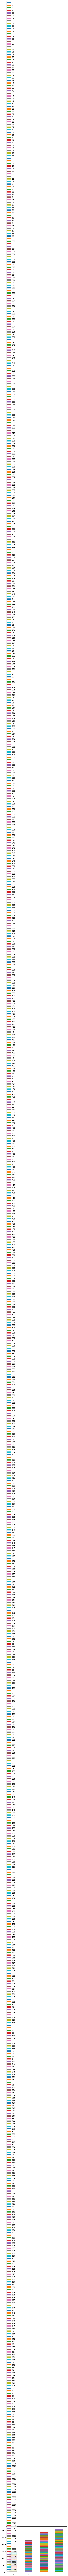

In [96]:
nuc_freq.plot(kind='bar', stacked=True)
plt.show()

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_20221/1999921280.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=nuc_freq.melt(var_name='Position', value_name='Frequency'),


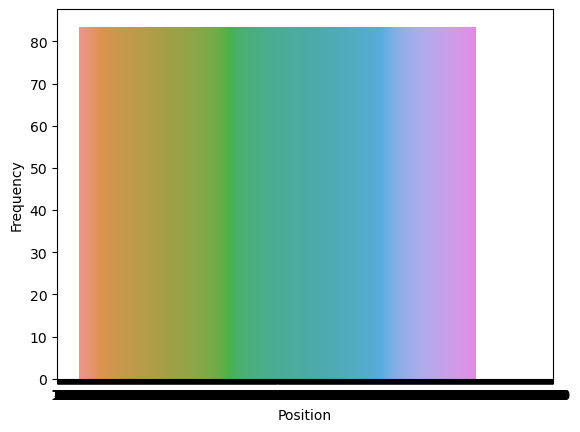

In [93]:
sns.countplot

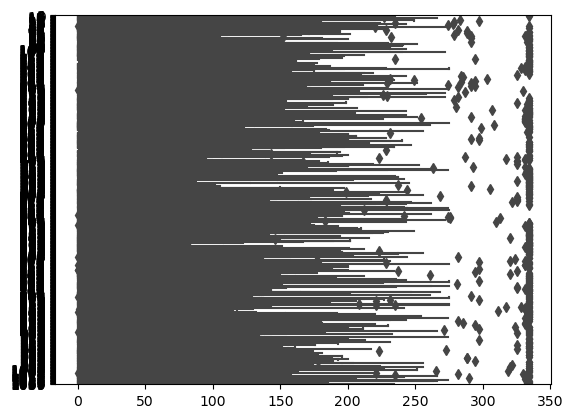

In [91]:
# Visualize distribution of nucelotides
sns.boxplot(data=nuc_freq, orient='h')
plt.show()